### Problem Statement
#### Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc
 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
    

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [894]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import style
pd.set_option('display.max_rows', 60)
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [895]:
#Read the loan data file 
loan = pd.read_csv("loan.csv",encoding = "ISO-8859-1")

In [896]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [897]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


In [898]:
loan.shape

(39717, 111)

### Data Cleaning

In [899]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [900]:
#stats for missing values in table 
missingValstats = round(100* (loan.isnull().sum()/len(loan.id)),2)

In [901]:
missingValstats

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [902]:
#missing values list where percentage is > 0 
missingValstats.loc[missingValstats > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 68, dtype: float64

In [903]:
# Lets remove the columns having 100 % missing values
print(len(list(missingValstats[missingValstats == 100].index)))

54


In [904]:
#There are 54 columns with 100% null values, lets drop such columns 
loan = loan.drop(list(missingValstats[missingValstats == 100].index), axis = 1)

In [905]:
loan.shape

(39717, 57)

In [906]:
missingValstats = round(100* (loan.isnull().sum()/len(loan.id)),2)
missingValstats.loc[missingValstats > 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
mths_since_last_delinq       64.66
mths_since_last_record       92.99
revol_util                    0.13
last_pymnt_d                  0.18
next_pymnt_d                 97.13
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [907]:
#Lets remove the columns having null values > 50%
loan = loan.drop(list(missingValstats[missingValstats >= 90].index), axis = 1)

In [908]:
loan.shape

(39717, 55)

In [909]:
missingValstats = round(100* (loan.isnull().sum()/len(loan.id)),2)
missingValstats.loc[missingValstats > 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
mths_since_last_delinq       64.66
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [910]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [911]:
#Checking the unique values in columns: chargeoff_within_12_mths,collections_12_mths_ex_med,tax_liens
pd.DataFrame(loan, columns=['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens']).apply(pd.Series.value_counts)

,chargeoff_within_12_mths,collections_12_mths_ex_med,tax_liens
0.00,39661,39661,39678


In [912]:
#As the columns chargeoff_within_12_mths,collections_12_mths_ex_med,tax_liens has either 0 or nan values , lets drop them 
loan = loan.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens'],axis=1)

In [913]:
loan.shape

(39717, 52)

In [914]:
loan.pub_rec_bankruptcies.value_counts()

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

In [915]:
#lets drop off the pub_rec_bankruptcies's 1.75% null records 
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [916]:
#Checking null percentage again 
missingValstats = round(100* (loan.isnull().sum()/len(loan.id)),2)
missingValstats.loc[missingValstats > 0]

emp_title                 6.19
emp_length                2.75
desc                     33.15
title                     0.03
mths_since_last_delinq   65.80
revol_util                0.13
last_pymnt_d              0.18
dtype: float64

In [917]:
# the columns emp_title and emp_lennght null values can be removed as it contains the information about customer's job title and their employment length 
loan=loan[~loan.emp_length.isnull()]
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
#dropping the desc columns as same info is available in purpose and title column of the data
loan=loan.drop(['desc'],axis=1)
loan=loan.drop(['mths_since_last_delinq'],axis=1)

In [918]:
missingValstats = round(100* (loan.isnull().sum()/len(loan.id)),2)
missingValstats.loc[missingValstats > 0]

Series([], dtype: float64)

In [919]:
loan.shape

(36433, 50)

In [920]:
missingValstats = round(100* (loan.isnull().sum()/len(loan.id)),2)
missingValstats.loc[missingValstats != 0]

Series([], dtype: float64)

In [921]:
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

**dropping the the columns which are not useful for analysis**
'id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'

In [922]:
loan = loan.drop(['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'],axis = 1 )

In [923]:
loan.shape

(36433, 29)

In [924]:
#Looking at the date columns
loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
1,Dec-11,Apr-99,Apr-13,Sep-13
3,Dec-11,Feb-96,Jan-15,Apr-16
4,Dec-11,Jan-96,May-16,May-16
5,Dec-11,Nov-04,Jan-15,Jan-16
6,Dec-11,Jul-05,May-16,May-16


In [925]:
loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].dtypes

issue_d               object
earliest_cr_line      object
last_pymnt_d          object
last_credit_pull_d    object
dtype: object

In [926]:
#Converting the object type to datetime for columns - 'issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')
loan.issue_d  = pd.to_datetime(loan.issue_d , format='%b-%y')

In [927]:
loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].dtypes

issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

In [928]:
loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2016-05-01,2016-05-01
5,2011-12-01,2004-11-01,2015-01-01,2016-01-01
6,2011-12-01,2005-07-01,2016-05-01,2016-05-01


In [929]:
loan[['int_rate','revol_util']].head()

,int_rate,revol_util
1,15.27%,9.40%
3,13.49%,21%
4,12.69%,53.90%
5,7.90%,28.30%
6,15.96%,85.60%


In [930]:
#removing % from values and setting dtype as float for columns int_rate and revol_util
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [931]:
loan[['int_rate','revol_util']].head()

,int_rate,revol_util
1,15.27,9.40
3,13.49,21.00
4,12.69,53.90
5,7.90,28.30
6,15.96,85.60


In [932]:
loan[['int_rate','revol_util']].dtypes

int_rate      float64
revol_util    float64
dtype: object

There are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.
These columns are:

1. issue_d

2. earliest_cr_line

3. last_pymnt_d

4. last_credit_pull_d

In [933]:
#Checcking unique values in emp_length column
loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [934]:
#As per the description given in the description file lets convert values in this column
emplengthdict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [935]:
loan=loan.replace({'emp_length' : emplengthdict})

In [936]:
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [937]:
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [938]:
#removing the "months" string from term column
loan.term = loan.term.apply(lambda x : x.split()[0])

In [939]:
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [940]:
#Lets split the available date into month and year column.
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [941]:
len(loan[loan['earliest_cr_line_year'] > 2011 ])

50

In [942]:
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [943]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

In [944]:
loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

In [945]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

Title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column

In [946]:
loan = loan.drop('title',axis =1 )
loan.shape

(36433, 32)

## Univariate  Analysis

**loan_status analysis**

In [947]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

<Figure size 216x216 with 0 Axes>

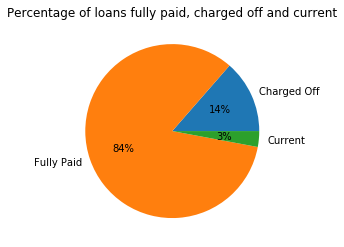

In [948]:
from itertools import chain
from collections import Counter
plt.figure(figsize=(3,3))
paid_percent = round(sum(loan.loan_status == 'Fully Paid')/len(loan) * 100, 2)
charged_off_percent = round(sum(loan.loan_status == 'Charged Off')/len(loan) * 100, 2)
current_percent = round(sum(loan.loan_status == 'Current')/len(loan) * 100, 2)
cts = Counter(loan.loan_status.unique())
fig, ax = plt.subplots()
plt.pie([ charged_off_percent,paid_percent, current_percent], labels=cts.keys(), autopct='%1.0f%%')
plt.title('Percentage of loans fully paid, charged off and current')
plt.show()

#### Observation
* As we can see from the plot above that majority (84%) of the borrowers have paid the full amount back. 14% of the borrowers are charged off and 3% of the borrowers are currently repaying loans

* Dropping off the 'current' loan status because we need to understand differences in the features between loans that have been 'fully paid' or 'charged off.'

In [949]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(35367, 32)

In [950]:
loan['loanstatus'] = loan.loan_status.apply(lambda x : 1 if x == 'Charged Off' else 0 )

In [951]:
loan['loanstatus'].value_counts()

0    30424
1     4943
Name: loanstatus, dtype: int64

In [952]:
#Method to display counts on bar plots
def showCountsLabel(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            #label = "{:.1f}".format(y_value)
            label = y_value
        else:
            try:
                #label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
                label = str(counts[str(labels[i].get_text())])
            except:
                #label = "{:.1f}".format(y_value)
                label = y_value
       
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [953]:
#Method to show percentage on plots
def showPercentageLabel(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) 
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [954]:

#Method to plot the target variable percentage in database
def plot_percentages(loan, by):
    values = (loan[by].value_counts(normalize=True)*100)
    if False:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('muted', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showPercentageLabel(ax)

# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(10,5))
    sns.boxplot(y=dataframe[col], x=dataframe['loan_status'], data=dataframe)
    plt.show()

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('muted', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showPercentageLabel(ax, grp['Charged Off'].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

#Method to plot count plot and  % population defaulted 
def plotgraphs(by,sortbyindex=False):
    plt.figure(figsize=(15, 5))
    # subplot 1: 
    plt.subplot(1, 2, 1)
    grp = loan.groupby(['loan_status',by])[by].count()
    chart = sns.countplot(x=by,  hue="loan_status", data=loan)
    showCountsLabel(chart, grp['Charged Off'].to_dict())
    plt.title("Count Plot for Charged off and Fully Paid loans")
    
    # subplot 2: 
    plt.subplot(1, 2, 2)
    plotLoanStatus(loan,by)

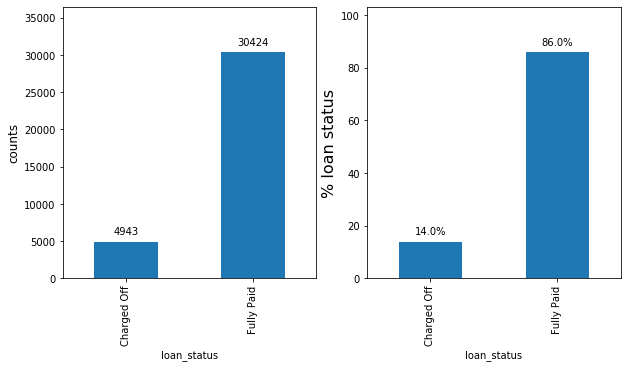

In [955]:
#Understanding the loan status counts
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
ax = loan.groupby('loan_status').loan_status.count().plot.bar()
ax.set_ylabel('counts', fontsize=12)
grp = loan.groupby(['loan_status'])['loan_status'].count()
showCountsLabel(ax, grp.to_dict())

plt.subplot(1, 2, 2)
ax = (loan.groupby('loan_status').loan_status.count() * 100 / len(loan.loanstatus)).plot.bar()
ax.set_ylabel('% loan status', fontsize=16)
plt.margins(0.2, 0.2)
showPercentageLabel(ax)
plt.show()

**Observation :**
* It is observed that 86% loan is fully paid where as 14 % loan is charged off

**loan_amnt**

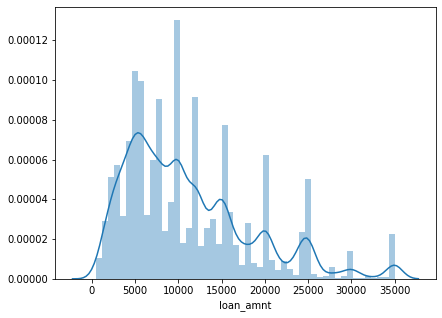

In [956]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loan['loan_amnt'])

In [957]:
#Creating derived categorical variables 
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'],[x for x in range (0,36000,5000)], labels = [str(x) + '-' + str(x+5) + 'k' for x in range (0,35,5)])

In [958]:
loan.loan_amnt_bin.value_counts()

5-10k     11748
0-5k       8432
10-15k     7200
15-20k     4059
20-25k     2599
30-35k      668
25-30k      661
Name: loan_amnt_bin, dtype: int64

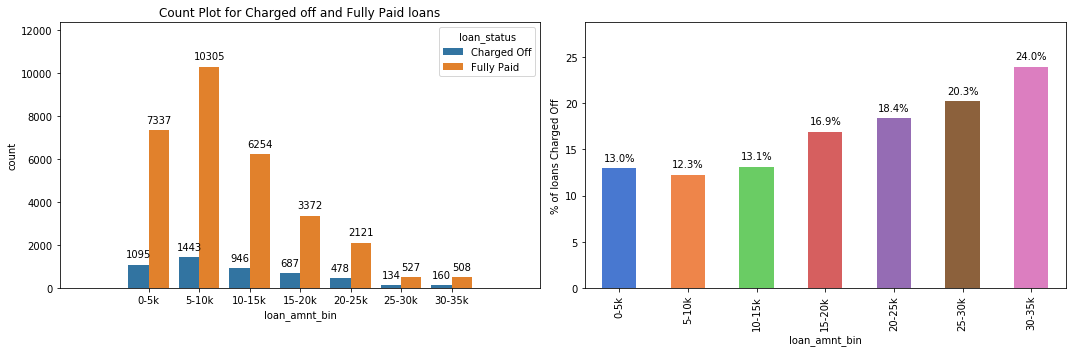

In [959]:
plotgraphs('loan_amnt_bin')

**Observations:** 

Top 3 Charged off loan amount bins :
1. 30-35K : 24% are defaults in this category 
2. 25-30K : 20.3% are defaults in this category 
3. 10-15k : 18.4% are defaults in this category

**The % of charged off loans increases substantially as we go up the loan bucket**



**Variable: term**
* Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

<Figure size 720x360 with 0 Axes>

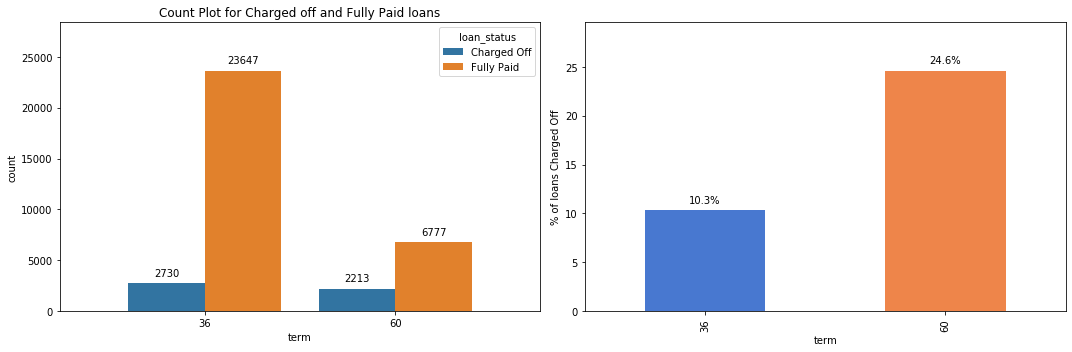

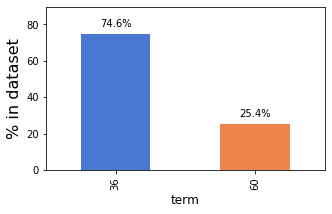

In [960]:
plt.figure(figsize=(10,5))
plotgraphs('term')
plt.figure(figsize=(5,3))
plot_percentages(loan,'term')


#### Observation:

* 74.6% of the total loans are given for duration of 3 years. while 25% of the loans are those given for 5 years.
* ~25% of loan given for 60 months duration are charged off.

**purpose**

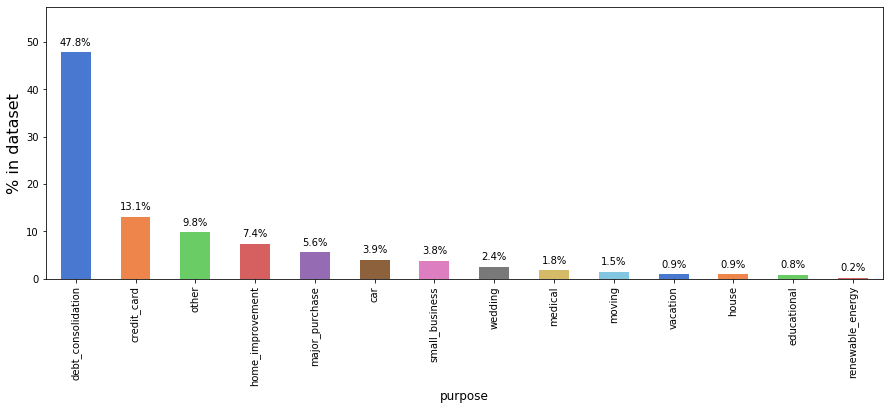

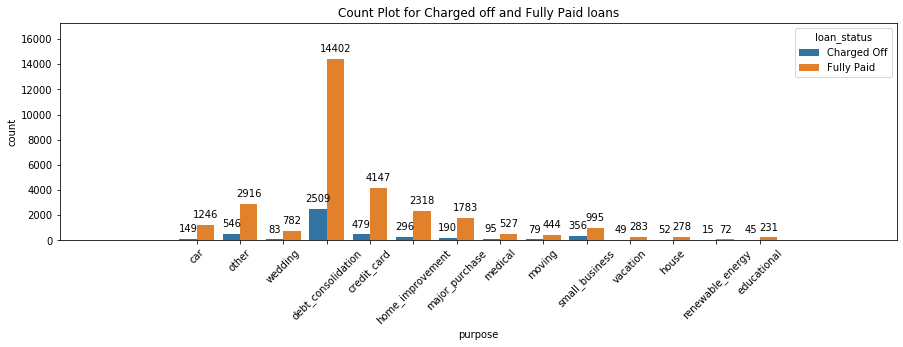

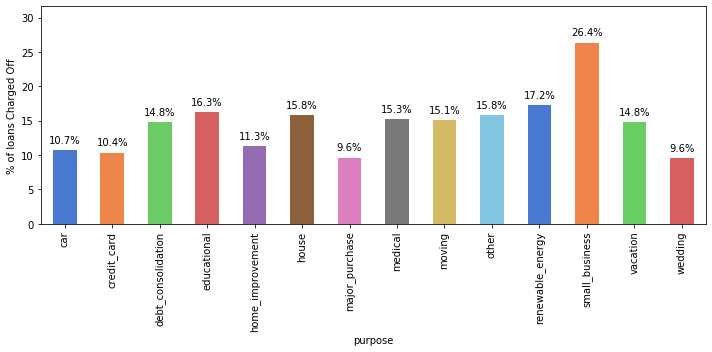

In [961]:
#Plotting % distribution of purpose in dataset 
plt.figure(figsize=(15,5))
#plot_percentages(loan, 'purpose')

values = (loan['purpose'].value_counts(normalize=True)*100)
if False:
    values = values.sort_index()
ax = values.plot.bar(color=sns.color_palette('muted', 16))
ax.set_ylabel('% in dataset', fontsize=16)
ax.set_xlabel('purpose', fontsize=12)
showPercentageLabel(ax)
    
#Plotting count distribution of target column purpose with respect to loan status
plt.figure(figsize=(15, 4))
chart = sns.countplot(x='purpose',  hue="loan_status", data=loan)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
grp = loan.groupby(['loan_status','purpose'])['purpose'].count()
showCountsLabel(chart, grp['Charged Off'].to_dict())
plt.title("Count Plot for Charged off and Fully Paid loans")
plt.show()

#Plotting % of loan charged off out of each purchase bin 
plt.figure(figsize=(10, 5))
plotLoanStatus(loan,'purpose')

#### Observation:
* 26.3 % Small business are charged off 
* 16.3 % educational loans are charged off 
* 17% of the loans for renewable_enrgy are charged Off

**Avoid approving loan for small businesses**



**Variable: pub_rec_bankruptcy**
* Data_Dictionary: Number of public record bankruptcies

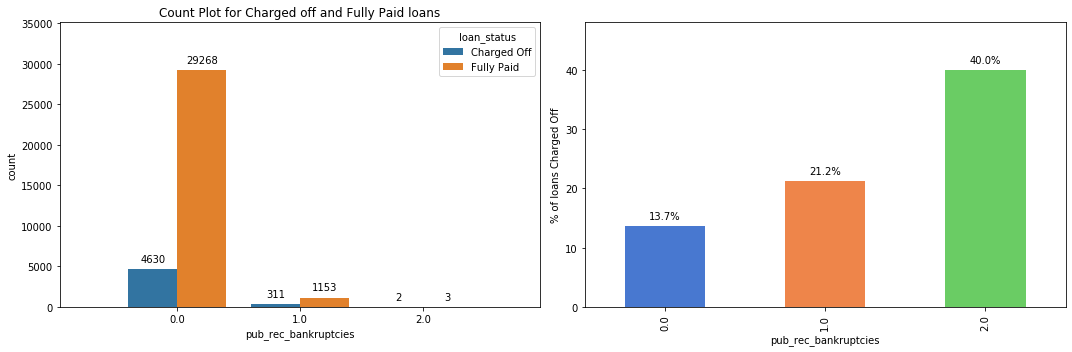

In [962]:
plotgraphs('pub_rec_bankruptcies')

##### Observation
* 1.0 and 2.0 pub_rec_bankruptcies are not preferred for lending loans 

* Approve loans for applications have zero record bankruptcies

#### Variable: int_rate
* Data_Dictionary: Interest Rate on the loan.

In [963]:
loan.int_rate.describe()

count   35367.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

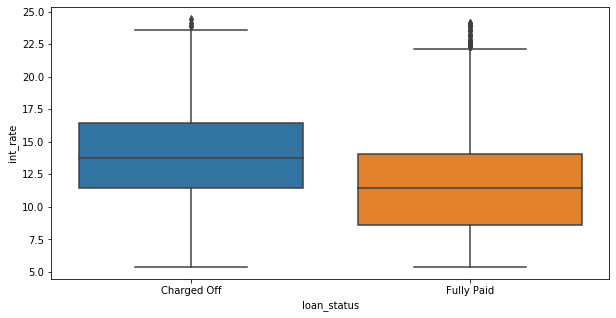

In [964]:
plot_distribution(loan, 'int_rate')

#### Observation:

* The intrest rate for Charged Off loans appear to be higher than for Fully paid. As, the risk increases the rate of interest imposed on the loan also increases.

In [965]:
#Rounding of the interest rate to create buckets
loan['interest_rate_buckets'] = round(loan['int_rate'])

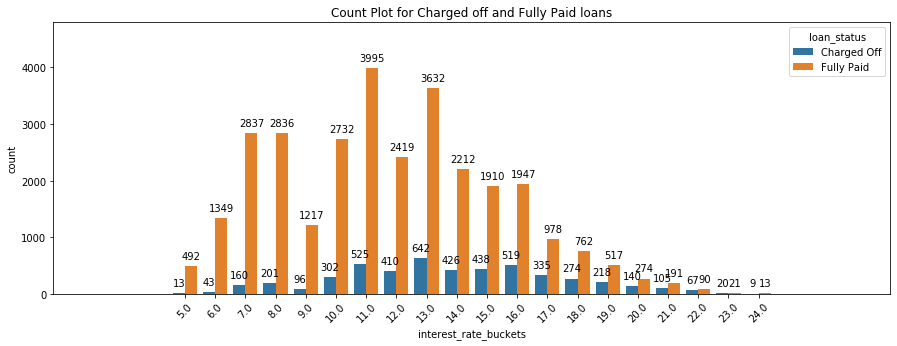

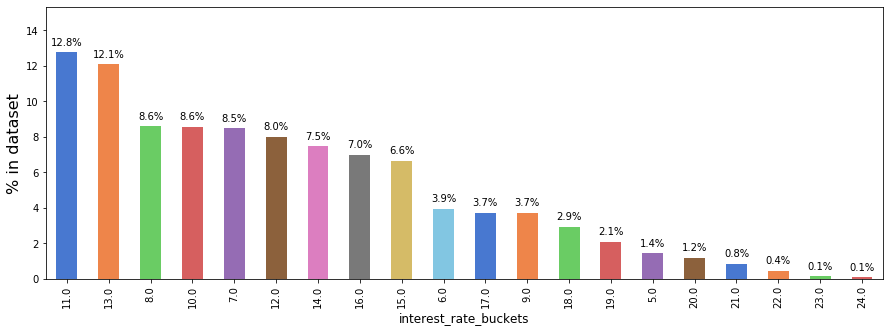

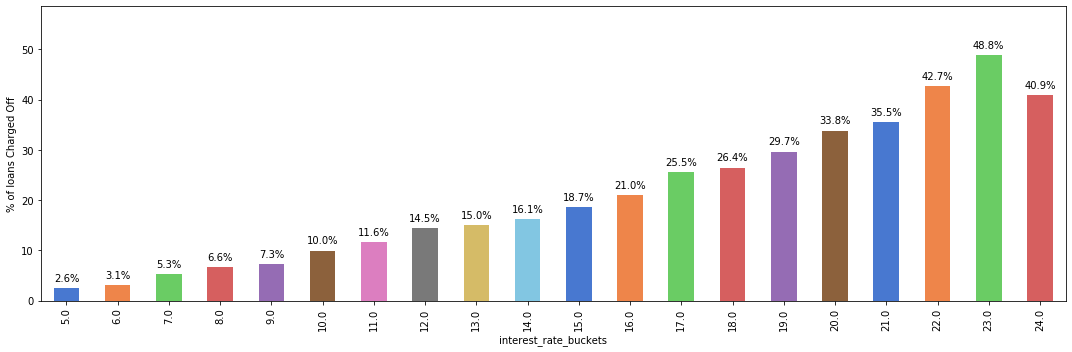

In [966]:
#Count plot for target variable interest rate
plt.figure(figsize=(15, 5))
chart = sns.countplot(x='interest_rate_buckets',  hue="loan_status", data=loan)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
grp = loan.groupby(['loan_status','interest_rate_buckets'])['interest_rate_buckets'].count()
showCountsLabel(chart, grp['Charged Off'].to_dict())
plt.title("Count Plot for Charged off and Fully Paid loans")
plt.show()

#percentage population plot for target variable interest rate
plt.figure(figsize=(15,5))
plot_percentages(loan, 'interest_rate_buckets')

# percentage of charged off % against each interest rate  
plt.figure(figsize=(15, 5))
plotLoanStatus(loan,'interest_rate_buckets')

**Observations:**
1. As the interest rate increases the charged off % also increases 

#### Variable: installment
* Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

In [967]:
loan.installment.describe()

count   35367.00
mean      324.04
std       207.15
min        16.08
25%       167.84
50%       280.62
75%       426.64
max      1305.19
Name: installment, dtype: float64

#### Variable: grade and sub_grade
* Data_Dictionary: LC assigned loan grade and subgrade.

In [968]:
loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

**grade and sub_grade**

<Figure size 1080x360 with 0 Axes>

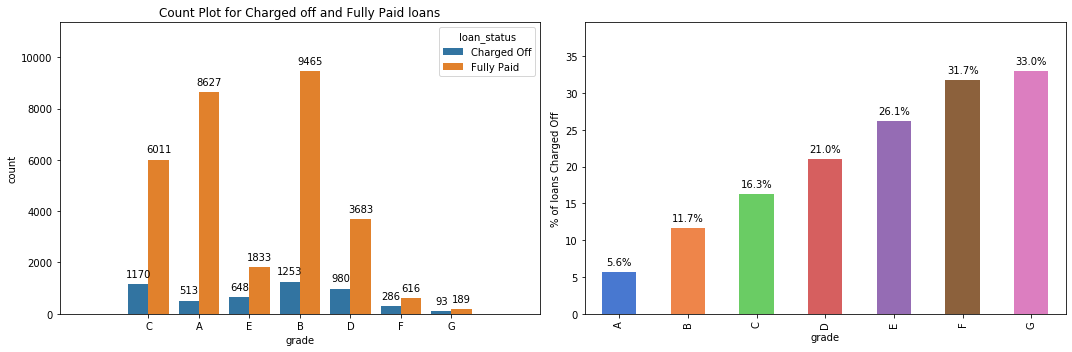

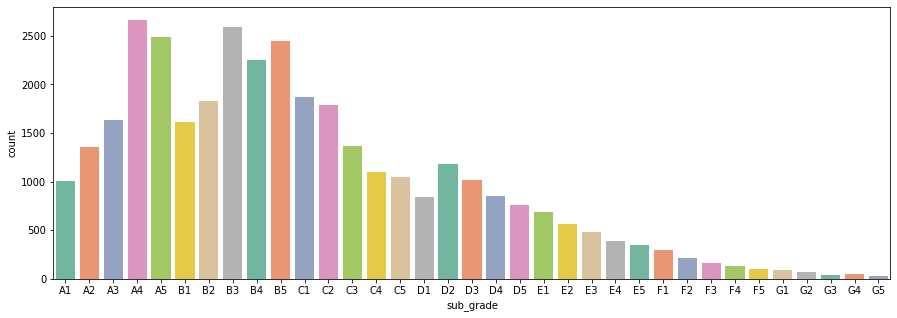

In [969]:
#Count plot and % of loan charged off against target column
plt.figure(figsize=(15,5))
plotgraphs('grade')

#Count plot for sub_grades
plt.figure(figsize=(15,5))
sns.countplot(loan['sub_grade'], order=sorted(loan.sub_grade.unique()), palette = "Set2")
plt.show()



#### Observation:

* Grade A and B loans are safe.
* Grade D, E, F, G loans are less safe.
* Nearly 30% of all loans in Grades F and G see a default.
* Grade E onwards are risky
* As the grade decreases the risk increases

**int_rate Analysis Vs Grade**

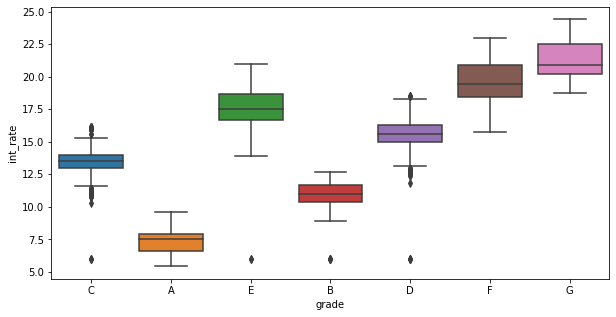

In [970]:
plt.figure(figsize=(10,5))
sns.boxplot(y=loan['int_rate'], x=loan['grade'], data=loan)

**Observation:**

* Interest rates are higher for lower grade loans(E,F,G).

#### Variable - emp_length
* Data_Dictionary: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [971]:
loan.emp_length.value_counts(normalize=True)

10   0.23
2    0.12
0    0.11
3    0.11
4    0.09
5    0.09
1    0.08
6    0.06
7    0.05
8    0.04
9    0.03
Name: emp_length, dtype: float64

**emp_length analysis**

<Figure size 1080x360 with 0 Axes>

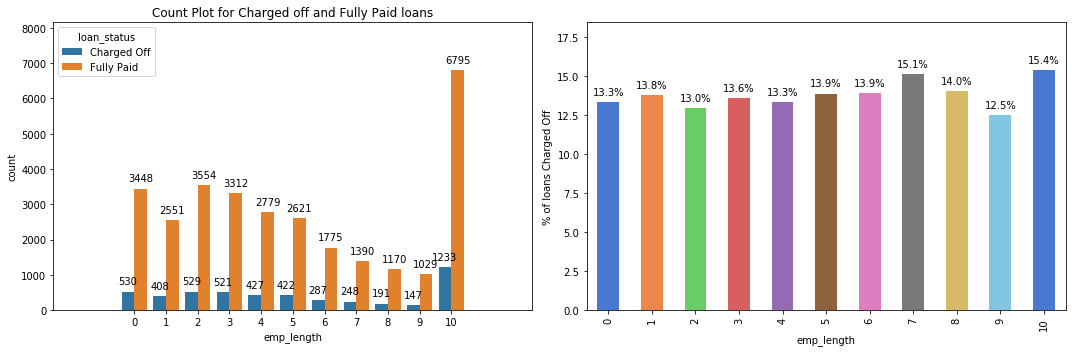

In [972]:
plt.figure(figsize=(15, 5))
plotgraphs('emp_length')
plt.show()

#### Observation:

* higest loan is given to 10 years experienced people
* 15% of 10 years experienced are defaulted 

#### Variable - home_ownership
* Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

<Figure size 720x360 with 0 Axes>

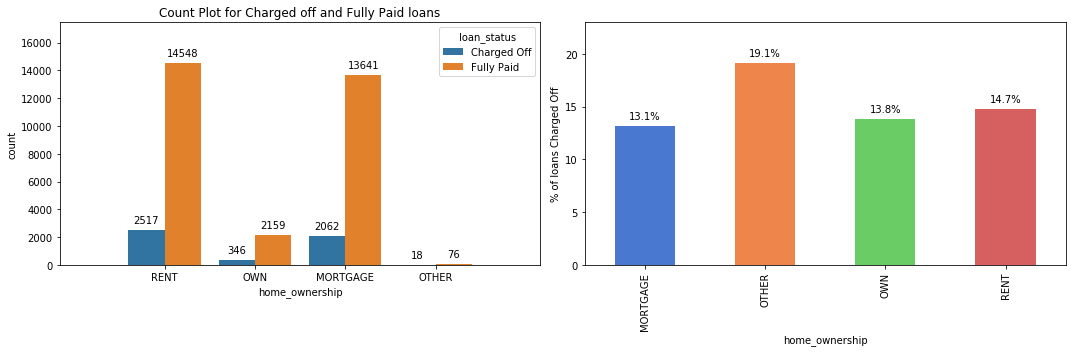

In [973]:
plt.figure(figsize=(10,5))
plotgraphs('home_ownership')

#### Observation 
* the loans belonging to Other category on home ownership tend to be defaulters (19.4%)

#### Variable - annual_inc
* Data_Dictionary: The self-reported annual income provided by the borrower during registration.

In [974]:
loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count     35367.00
mean      69095.99
std       63967.05
min        4000.00
10%       30000.00
25%       41500.00
50%       60000.00
75%       82500.00
90%      115000.00
max     6000000.00
Name: annual_inc, dtype: float64

**Observations**

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000.

Median annual income is around 60,000

Most people have an annual income less than 115000

In [975]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = loan[np.abs(loan.annual_inc-loan.annual_inc.mean()) <= (3*loan.annual_inc.std())]

In [976]:
df.annual_inc.describe()

count    35122.00
mean     66255.52
std      35749.84
min       4000.00
25%      41004.00
50%      59449.00
75%      81969.00
max     260000.00
Name: annual_inc, dtype: float64

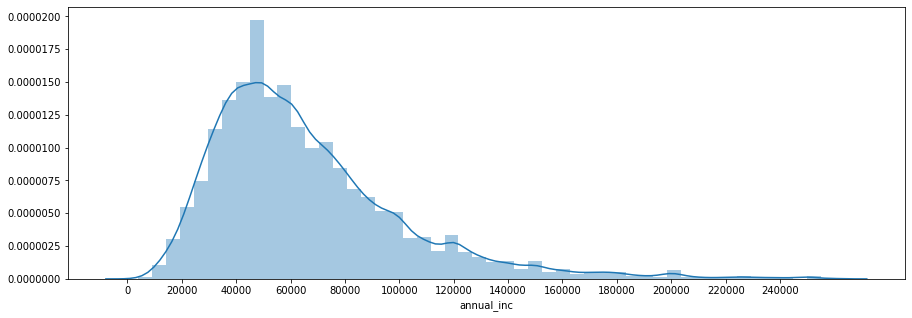

In [977]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

* 10000 seems to be a good bin size to further analyze income as categories

In [978]:
#Creating Derived categorical variable
loan['income_bin'] = loan['annual_inc']/20000
loan['income_bin'] = loan['income_bin'].astype(int)

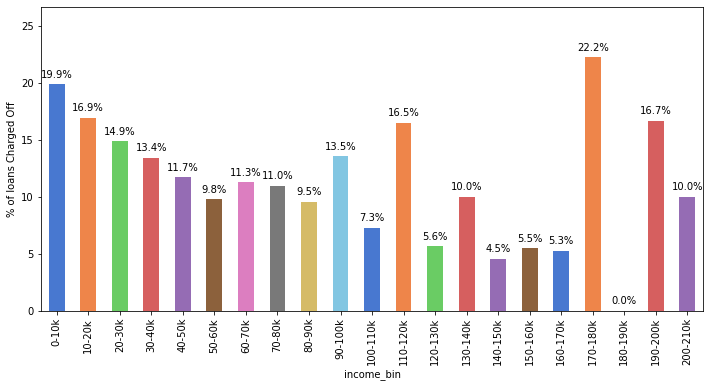

In [979]:
# Percentage of charged off loans for each bucket
plt.figure(figsize=(10,5))
ax = plotLoanStatus(loan.loc[loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])
plt.show()

**Observation**
* loans taken by applicants having anual income 170K-180K have 23% defaulters

#### Variable - verification_status
* Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

In [980]:
loan.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

<Figure size 1440x360 with 0 Axes>

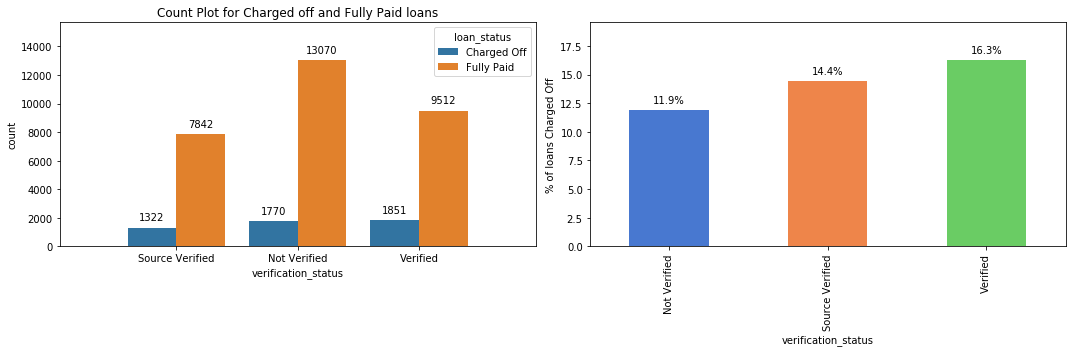

In [981]:
plt.figure(figsize=(20,5))
plotgraphs('verification_status')


#### Observation:

* itis seen that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.


#### Variable: issue_d
* Data_Dictionary: The month which the loan was funded

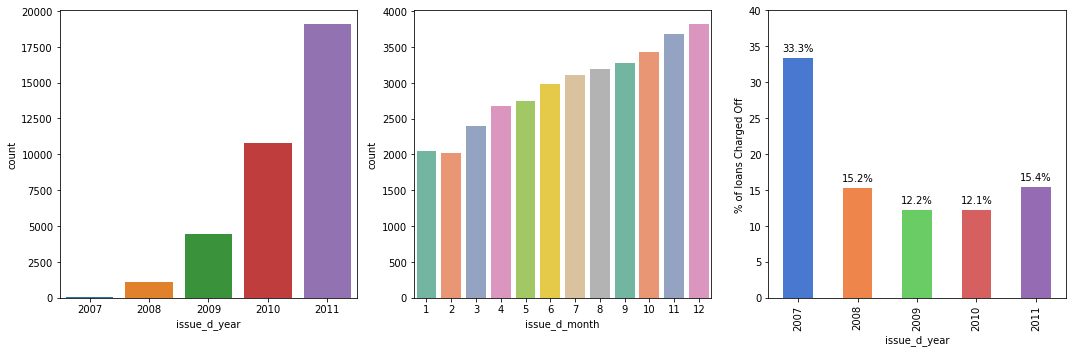

In [982]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(loan['issue_d_year'], order=sorted(loan.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(loan['issue_d_month'], order=sorted(loan.issue_d_month.unique()),  palette = "Set2")

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(loan, 'issue_d_year')

plt.show()


##### Observation:

* There is significant rise in the loan count from 2017 onwards 
* Year of loan has no significant effect of default.

<Figure size 720x360 with 0 Axes>

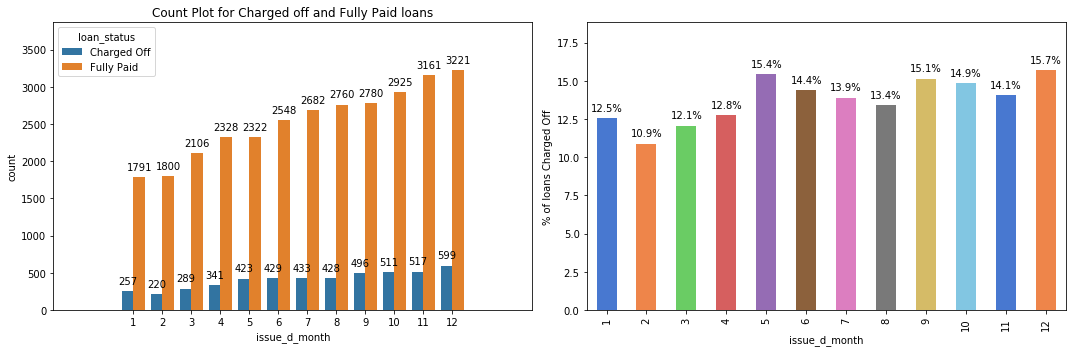

In [983]:
plt.figure(figsize=(10, 5))
plotgraphs('issue_d_month')

#### Observation:

* Month of loan is spread out and has no significant effect on likelihood of default.

#### Variable - addr_state
* Data_Dictionary: The state provided by the borrower in the loan application

In [984]:
loan.addr_state.value_counts(normalize=True).head(10)

CA   0.18
NY   0.10
FL   0.07
TX   0.07
NJ   0.05
IL   0.04
PA   0.04
VA   0.04
GA   0.04
MA   0.03
Name: addr_state, dtype: float64

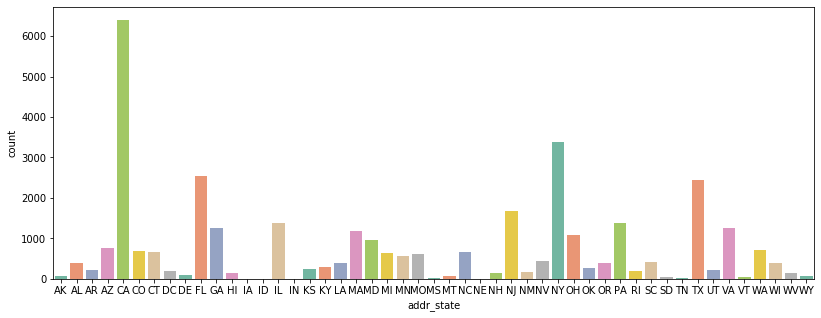

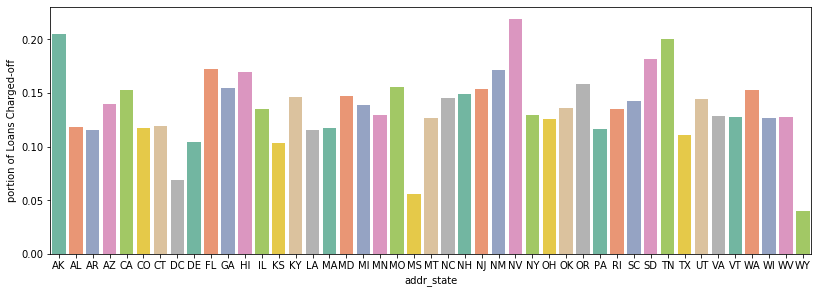

In [985]:
#count plot for addr_state
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan['addr_state'], order=sorted(loan.addr_state.unique()), palette = "Set2")

#Fraction of loans charged off and fully Paid
charge_off_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values , palette = "Set2")
a.set_ylabel('portion of Loans Charged-off')
plt.show()


#### Observation:

* States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. 

##### Variable - dti
* Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [986]:
loan.dti.describe()

count   35367.00
mean       13.40
std         6.64
min         0.00
25%         8.32
50%        13.50
75%        18.64
max        29.99
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

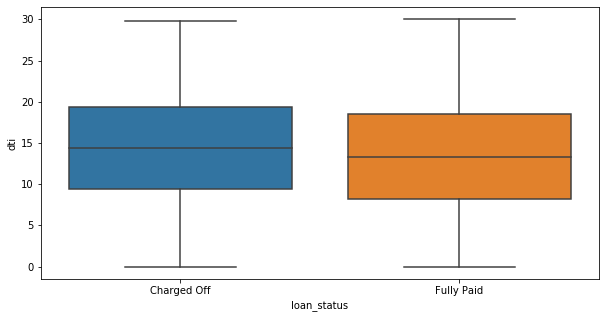

In [987]:
plt.figure(figsize=(10,5))
plot_distribution(loan, 'dti')

In [988]:
#Creating buckets for dti
loan['dti_bin'] = pd.cut(loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

<Figure size 720x360 with 0 Axes>

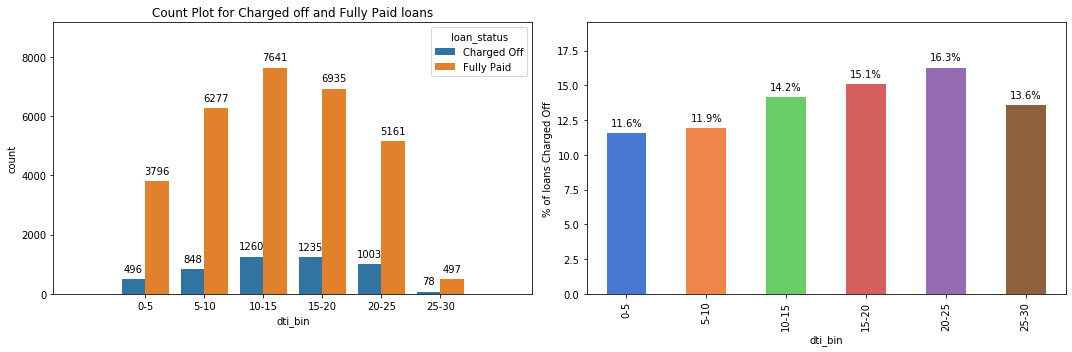

In [989]:
plt.figure(figsize=(10,5))
plotgraphs('dti_bin')
plt.show()

#### Observation:

* Higher the dti higher the chances of loan being Charged Off

#### Variable - delinq_2yrs
* Data_Dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [990]:
loan.delinq_2yrs.value_counts(normalize=True)

0    0.89
1    0.08
2    0.02
3    0.01
4    0.00
5    0.00
6    0.00
7    0.00
8    0.00
11   0.00
9    0.00
Name: delinq_2yrs, dtype: float64

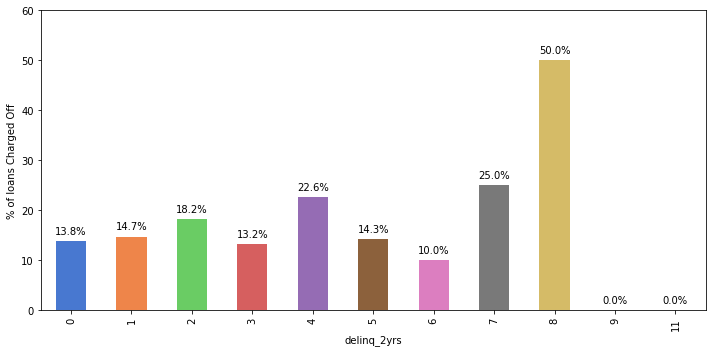

In [991]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan, 'delinq_2yrs')

#### Observation:

* The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
* There are higher chances of default if this variable is greater than 3.

#### Variable - open_acc

In [992]:
loan.open_acc.describe()

count   35367.00
mean        9.33
std         4.37
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

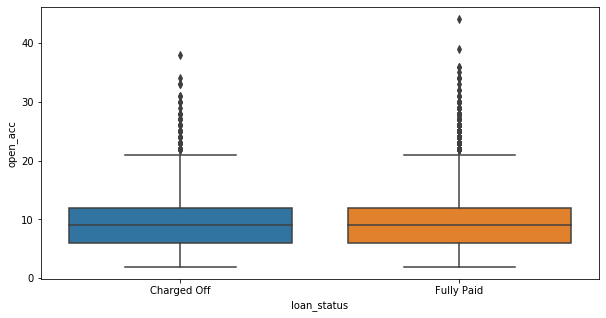

In [993]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'open_acc')
plt.show()

In [994]:
loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.00,9.31,4.49,2.00,6.00,9.00,12.00,38.00
Fully Paid,30424.00,9.34,4.36,2.00,6.00,9.00,12.00,44.00


#### Observation:

* There is no significant difference in the credit lines of charged off and fully paid loans.

#### Variable - pub_rec
* Data_Dictionary: Number of derogatory public records.

In [995]:
loan.pub_rec.value_counts(normalize=True)

0   0.95
1   0.05
2   0.00
3   0.00
4   0.00
Name: pub_rec, dtype: float64

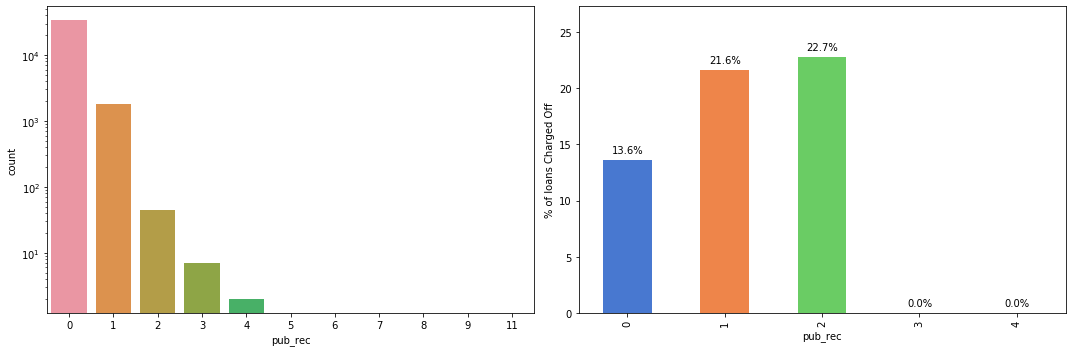

In [996]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(loan['pub_rec'], order=sorted(loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(loan, 'pub_rec')
plt.show()

#### Observation:

* Having even 1 derogatory record increases the chances of Charge Off significantly.

#### Variable - revol_bal
* Data_Dictionary: Total credit revolving balance

In [997]:
loan.revol_bal.describe()

count    35367.00
mean     13367.68
std      15678.46
min          0.00
25%       3782.00
50%       8934.00
75%      17064.50
max     149588.00
Name: revol_bal, dtype: float64

In [998]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan = loan[np.abs(loan.revol_bal-loan.revol_bal.mean()) <= (3*loan.revol_bal.std())]

In [999]:
#The values vary a lot. Transforming to a log scale will help analyse better.
loan['revol_bal_log'] = loan['revol_bal'].apply(lambda x : np.log(x+1))

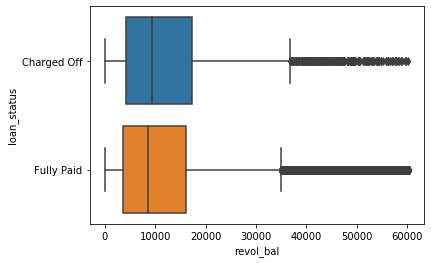

In [1000]:

sns.boxplot(x=loan['revol_bal'], y=loan['loan_status'], data=loan)
plt.show()

#### Observation:

* There is no large difference in revolving balance mean for charged off and fully Paid loans

**revol_util** :Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [1001]:
loan.revol_util.describe()

count   34597.00
mean       48.90
std        28.21
min         0.00
25%        25.60
50%        49.40
75%        72.30
max        99.90
Name: revol_util, dtype: float64

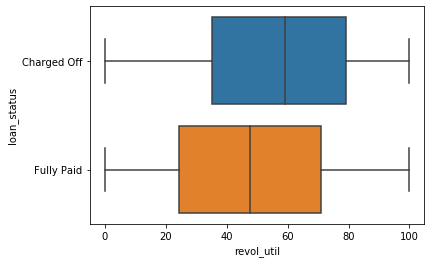

In [1002]:
sns.boxplot(x=loan['revol_util'], y=loan['loan_status'], data=loan)


#### Observation:

* The average utilization rate is around 49%

**revol_util**

In [1003]:
loan['revol_util_bin'] = round(loan['revol_util']/5)

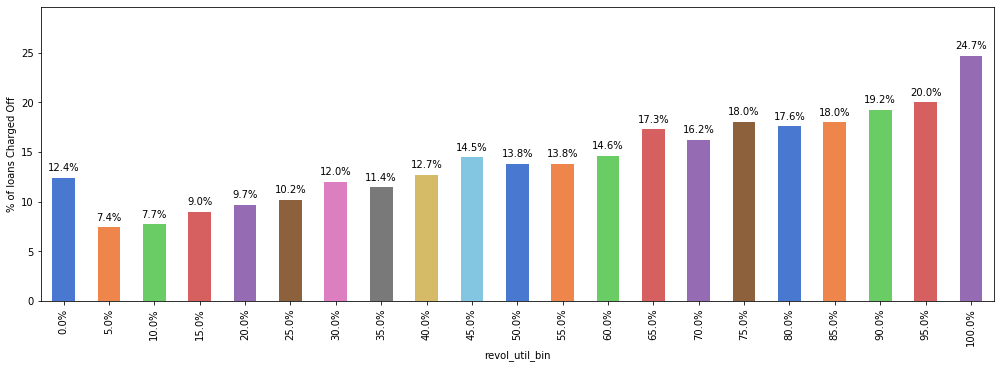

In [1004]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(loan, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()


#### Variable - total_acc
* Data_Dictionary: The total number of credit lines currently in the borrower's credit file.

In [1005]:
loan.total_acc.describe()

count   34597.00
mean       22.01
std        11.33
min         2.00
25%        13.00
50%        20.00
75%        29.00
max        90.00
Name: total_acc, dtype: float64

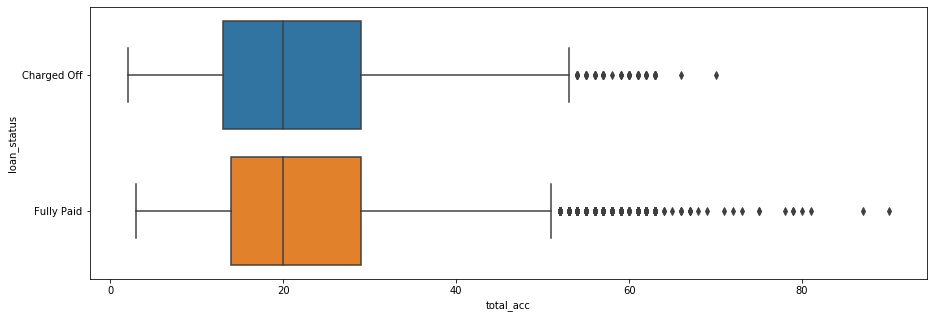

In [1006]:
plt.figure(figsize=(15,5))
sns.boxplot(x=loan['total_acc'], y=loan['loan_status'], data=loan)


#### Observation:

* There is no big difference between the Charged Off and Fully Paid credit lines, can be ignored for analysis

#### Variable - last_pymnt_d
* Data_Dictionary: Last month payment was received.

In [1007]:
loan.last_pymnt_d.value_counts().head()

2013-03-01    955
2014-12-01    861
2013-05-01    837
2013-02-01    806
2012-03-01    783
Name: last_pymnt_d, dtype: int64

In [1008]:
loan['last_pymnt_d_month']= loan['last_pymnt_d'].dt.month
loan['last_pymnt_d_year']= loan['last_pymnt_d'].dt.year

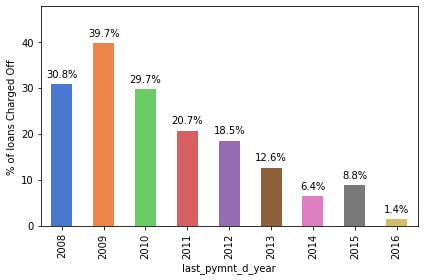

In [1009]:
plotLoanStatus(loan, 'last_pymnt_d_year')
plt.show()

#### Observation:

* This variable does not affect analysis and will be ignored.

#### Variable - last_pymnt_amnt
* Data_Dictionary: Last total payment amount received.

In [1010]:
loan.last_pymnt_amnt.describe()

count   34597.00
mean     2785.78
std      4477.70
min         0.01
25%       223.29
50%       594.11
75%      3573.86
max     36115.20
Name: last_pymnt_amnt, dtype: float64

In [1011]:
#Creating log scale
loan['last_pymnt_amnt_log'] = loan['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

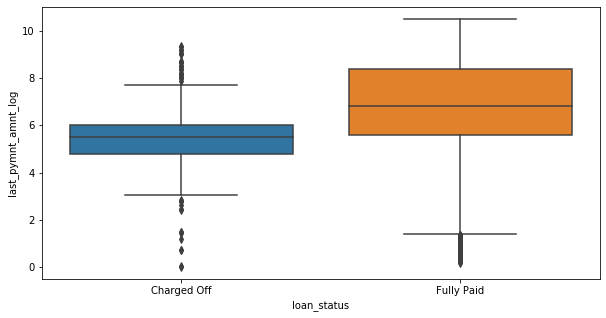

In [1030]:
plot_distribution(loan, 'last_pymnt_amnt_log')
plt.show()

#### Observation:

* The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans.
* This attribute can be ignored for the analysis  

### Bivariate Analysis

#####  loan_amnt over time

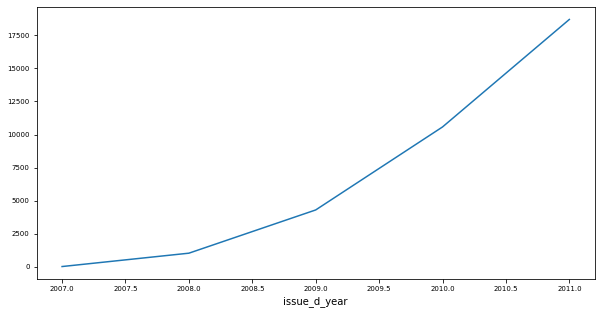

In [1013]:
plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

#### loan_amnt vs grade

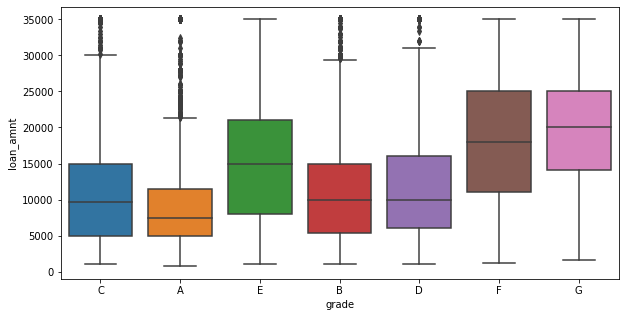

In [1014]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=loan['loan_amnt'], x=loan['grade'], data=loan)
plt.show()

* Large amount loans are given to lower grade

#### loan_amnt vs verification_status vs loan status

Text(0, 0.5, 'loan amount')

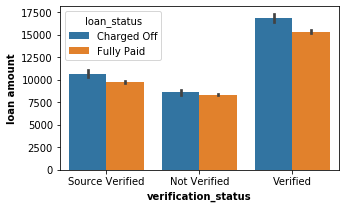

In [1015]:
plt.figure(figsize=(5,3))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.xlabel('verification_status', fontsize = 10, weight = 'bold')
plt.ylabel('loan amount', fontsize = 10, weight = 'bold')

#### Observation:

* Higher loan amounts are Verified more often.
* It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

#### Interest Rate and Term

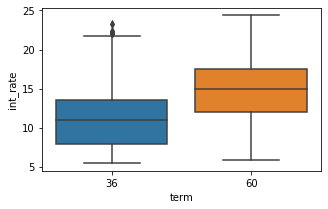

In [1016]:
plt.figure(figsize=(5,3))
sns.boxplot(y=loan['int_rate'], x=loan['term'], data=loan)
plt.show()

#### Observation:

* Larger terms were seen to be given for higher interest rate. 

#### Interest Rate and Sub Grade

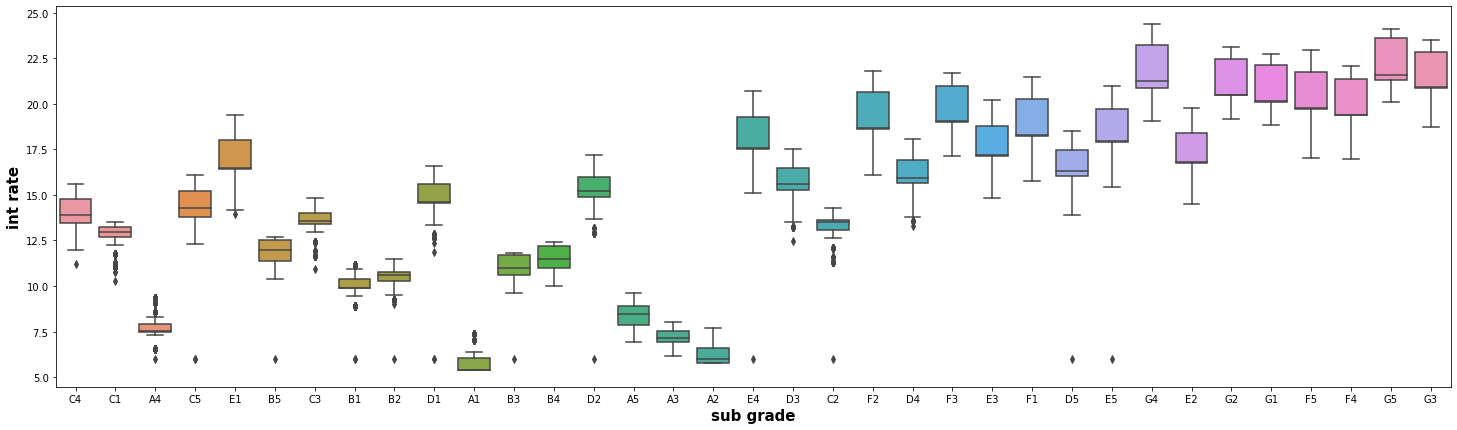

In [1017]:
plt.figure(figsize=(25,7))
sns.boxplot(y=loan['int_rate'], x=loan['sub_grade'], data=loan)
plt.xlabel('sub grade', fontsize = 15, weight = 'bold')
plt.ylabel('int rate', fontsize = 15, weight = 'bold')
plt.show()

#### Observation:

* Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

**int rate Vs loan status**

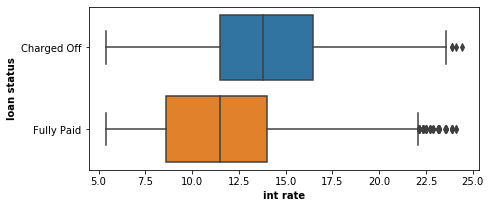

In [1018]:
plt.figure(figsize=(7,3))
sns.boxplot(x=loan['int_rate'], y=loan['loan_status'], data=loan)
plt.ylabel('loan status', fontsize = 10, weight = 'bold')
plt.xlabel('int rate', fontsize = 10, weight = 'bold')
plt.show()

**Observation:**

Loans at a higher intrest rate are more likely to be Charged Off.

#### Loan amount vs Grade vs Term

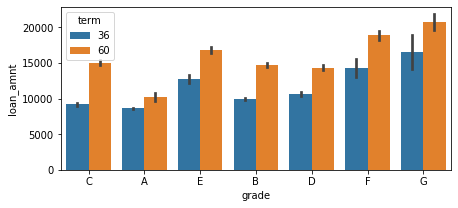

In [1019]:
plt.figure(figsize=(7,3))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan, estimator=np.mean)
plt.show()

#### Observation:

* Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status

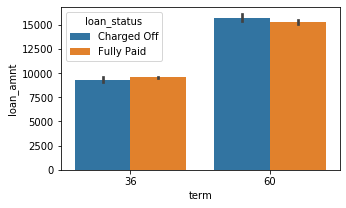

In [1020]:
plt.figure(figsize=(5,3))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

#### Observation:

* Higher loan amount are associated with longer terms and see higher Charge Offs.


**revol_util Vs grade Vs Loan Status**

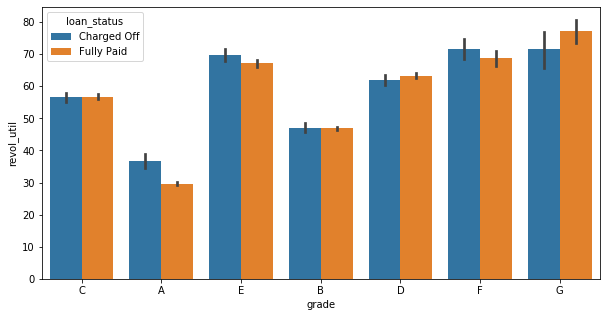

In [1021]:
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

#### Observation:

The revol_util and grade has positive correlation. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

#### revol_util vs Grade

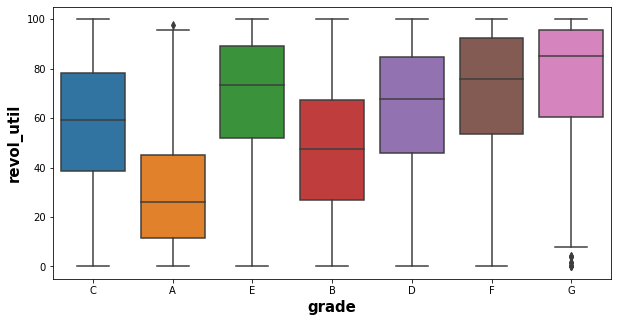

In [1022]:
plt.figure(figsize=(10,5))
sns.boxplot(y=loan['revol_util'], x=loan['grade'], data=loan)
plt.xlabel('grade', fontsize = 15, weight = 'bold')
plt.ylabel('revol_util', fontsize = 15, weight = 'bold')
plt.show()

In [1023]:
corr=loan.corr()
corr['loan_amnt']

loan_amnt                 1.00
int_rate                  0.30
installment               0.93
emp_length                0.15
annual_inc                0.25
dti                       0.06
delinq_2yrs              -0.04
inq_last_6mths            0.01
open_acc                  0.17
pub_rec                  -0.04
revol_bal                 0.37
revol_util                0.06
total_acc                 0.25
last_pymnt_amnt           0.48
pub_rec_bankruptcies     -0.03
earliest_cr_line_month   -0.02
earliest_cr_line_year    -0.19
issue_d_month             0.05
issue_d_year              0.12
loanstatus                0.07
interest_rate_buckets     0.30
income_bin                0.25
revol_bal_log             0.25
revol_util_bin            0.06
last_pymnt_d_month       -0.00
last_pymnt_d_year         0.10
last_pymnt_amnt_log       0.40
Name: loan_amnt, dtype: float64

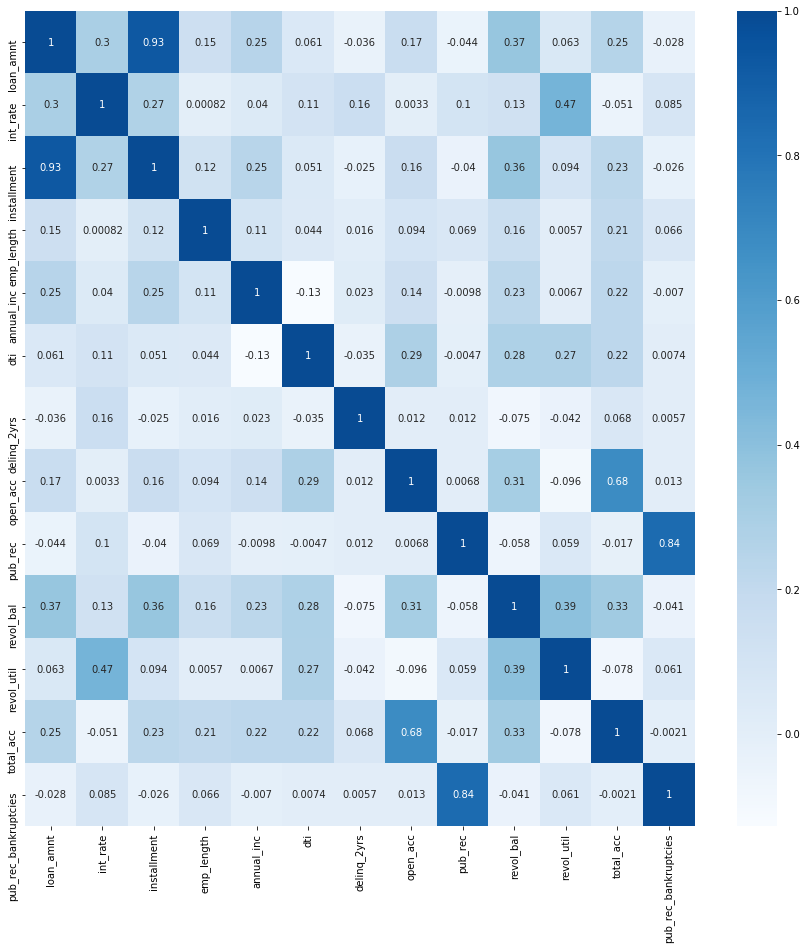

In [1024]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'delinq_2yrs', 'earliest_cr_line','open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'pub_rec_bankruptcies']
corr = loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5, cmap="Blues" )

#YlGnBu

#### Observation:

* loan_amnt is correlated with installmet with factor of .93
* int_rate is correlated with revol_util with r factor of .47 
* pub_rec is correlated with pub_rec_bankruptcies by factor 0.84

#### dti vs open_acc

In [1025]:
loan['dti_bin']
loan.groupby('dti_bin').int_rate.mean()

dti_bin
0-5     11.10
5-10    11.59
10-15   12.05
15-20   12.39
20-25   12.63
25-30    9.57
Name: int_rate, dtype: float64

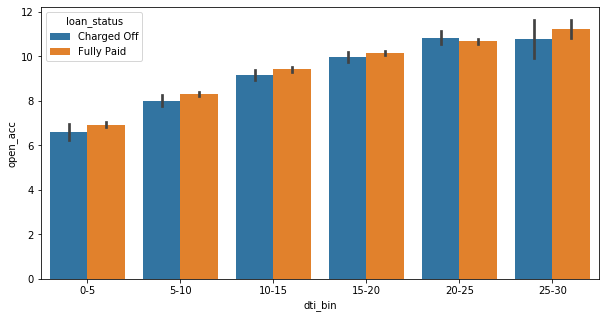

In [1026]:
plt.figure(figsize=(10,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan, estimator=np.mean)
plt.show()


#### Observation:

* The dti increses with the number of open credit line in borrowers credit file.

#### delinq_2yr VS loan amount VS loan status

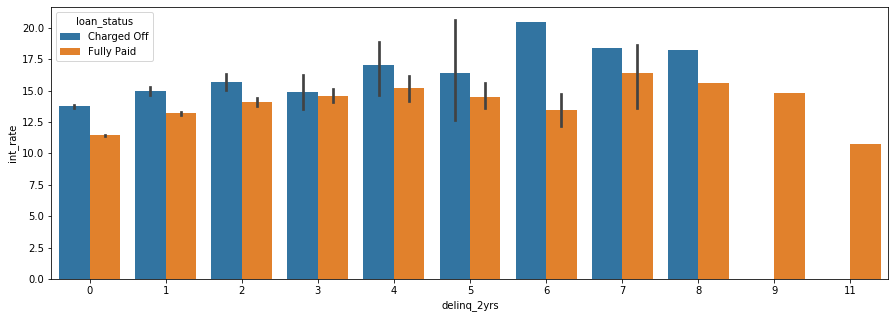

In [1027]:
plt.figure(figsize=(15,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan, estimator=np.mean)
plt.show()

#### Observation:

* Intrest rate offered inceases with the number of deliquency of the borrower.